In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import random
from math import trunc

In [24]:
show_cv_image
This function is for showing image at jupyter notebook. Opencv uses BGR color scheme, but normal color scheme is RGB. So, I convert BGR to RGB and show the image by using pyplot.

flip_image_vertical
This function is fliping image vertically. The parameter "1" of cv2.flip is meaning vertical change.

flip_image_horizontal
This function is fliping image horizontally. The parameter "0" of cv2.flip is meaning horizontal change.

brightness
The value parameter is meaning the degree of lightening. It makes the image brighter.

darkness
The value parameter is meaning the dergree of darkening. It makes the image darker.

rotation
The angle parameter is meaning the degree of rotation. When entering a positive value at angle, it rotates counterclockwise.

zoom_in
The scale parameter is meaning the degree of expansion. This zoom in randomly. The smaller the scale parameter value, the larger the magnification ratio.

SyntaxError: invalid syntax (<ipython-input-24-ddd5561919c5>, line 2)

In [3]:
root_path ="/P-Project & Lab/OpenCV/"

In [4]:
img = cv2.imread('E:\P-Project & Lab\OpenCV\IR.jpg')

In [5]:
def show_cv_image(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

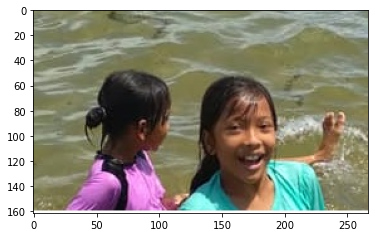

In [6]:
show_cv_image(img)

In [7]:
def flip_image_vertical(image):
    img = cv2.flip(image, 1)
    return img

In [8]:
def flip_image_horizontal(image):
    img = cv2.flip(image, 0)
    return img

In [9]:
temp = flip_image_vertical(img)

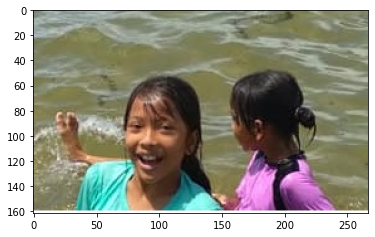

In [10]:
show_cv_image(temp)

In [11]:
temp = flip_image_horizontal(img)

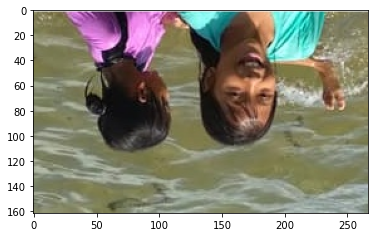

In [12]:
show_cv_image(temp)

In [13]:
def brightness(image, value=50):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [14]:
temp = brightness(img, 50)

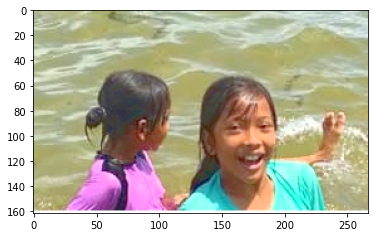

In [15]:
show_cv_image(temp)

In [16]:
def darkness(image, value=50):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    lim = value
    v[v > lim] -= value
    v[v <= lim] = 0
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [17]:
temp = darkness(img, 50)

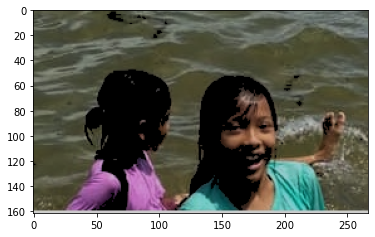

In [18]:
show_cv_image(temp)

In [19]:
def rotation(image, angle=90):
    rows, cols = image.shape[:2]
    rotate = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    dst = cv2.warpAffine(image, rotate, (cols, rows))
    
    return dst

In [20]:
temp = rotation(img, 90)

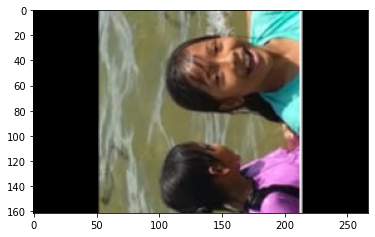

In [21]:
show_cv_image(temp)

In [22]:
def zoom_in(image, scale=0.6):
    h, w, c = image.shape
    
    zoom_w = trunc(w * scale)
    zoom_h = trunc(h * scale)
    
    rand_w = random.randint(0, w - zoom_w)
    rand_h = random.randint(0, h - zoom_h)
    
    pts1 = np.float32([[rand_w, rand_h], [rand_w, rand_h+zoom_h], [rand_w+zoom_w, rand_h], [rand_w+zoom_w, rand_h+zoom_h]])
    pts2 = np.float32([[0,0], [0,h], [w,0], [w,h]])
    
    img = cv2.getPerspectiveTransform(pts1, pts2)
    dst = cv2.warpPerspective(image, img, (w, h))
    
    return dst    

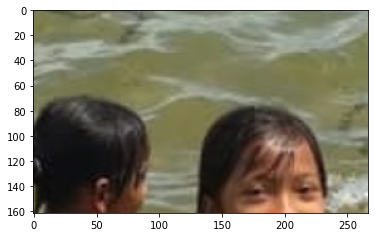

In [23]:
temp = zoom_in(img, 0.6)
show_cv_image(temp)